### Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [55]:
# for getting text length
nltk.download('punkt')

### Files

In [70]:
# filenames

gad_file = '../datasets/GAD/final_data/train.tsv'
euadr_file = '../datasets/euadr/final_data/train.tsv'
i2b2_file = '../datasets/i2b2_2010/new_train.tsv'
# n2c2_file = '../datasets/i2b2_2010/new_train.tsv'
n2c2_file = '/Users/lathapevi/Documents/git_repos/thesis/datasets/n2c2_2018/train_gold_rel.csv'

### GAD

In [71]:
df = pd.read_csv(gad_file,header=None, delimiter='\t', names=['sentence', 'label'])
df['sentence_len'] = df['sentence'].apply(lambda text: len(word_tokenize(text)))
df.columns

Index(['sentence', 'label', 'sentence_len'], dtype='object')

In [72]:
print(df['sentence_len'].unique())

# Creating bins for sentence length
max_sentence_length = df['sentence_len'].max()
print(max_sentence_length)
# Define custom bins based on longest sentence length
bins = np.linspace(0, max_sentence_length+10, 11) 

print("Bins are:")
print(bins)

[ 30  29  16  28  21  50  36  26  35  25  27  24  51  23  94  64  31  69
  32  46  37  41  20  22  33  34  13  47  49  57  44  45  39  18  17  40
  42  66  19  38  43  56  53  55  79  48  62  52  63  92  61  14  95  54
  15  60  59  71  67  65  58  70  72  68  12  75 102]
102
Bins are:
[  0.   11.2  22.4  33.6  44.8  56.   67.2  78.4  89.6 100.8 112. ]


In [73]:
count_256 = df[df['sentence_len'] < 256]
print(f"Number of sentences with length <= 256: {len(count_256)} out of {len(df)}")   

Number of sentences with length <= 256: 4797 out of 4797


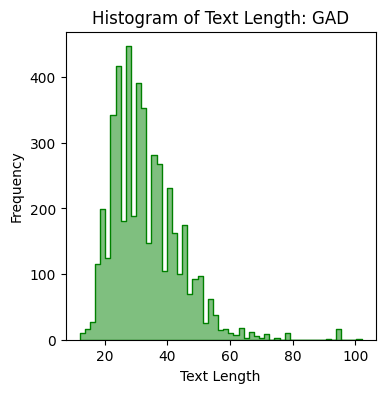

In [83]:

# Create a histogram
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x='sentence_len', element="step", color='green', alpha=0.5)
plt.title('Histogram of Text Length: GAD')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig('../visualisation/gad_text_dist.pdf',bbox_inches='tight')
plt.show()

### n2c2 2018

In [84]:

custom_bins = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550,600,650,700,750,800]

n2c2_df = pd.read_csv(n2c2_file, header=0, index_col=0)

In [85]:
# n2c2_df.head(5)

In [86]:
n2c2_df['sent_a'].fillna('', inplace=True)
n2c2_df['senta_b'].fillna('', inplace=True)

In [87]:
# n2c2_df.head(2)

In [88]:
n2c2_df['sent_a_len'] = n2c2_df['sent_a'].apply(lambda text: len(word_tokenize(text)))

In [89]:
n2c2_df['sent_b_len'] = n2c2_df['senta_b'].apply(lambda text: len(word_tokenize(text)))

102
[  0.   11.2  22.4  33.6  44.8  56.   67.2  78.4  89.6 100.8 112. ]
Sentences <= 256: 36408 out of 36408 equal to 1.0


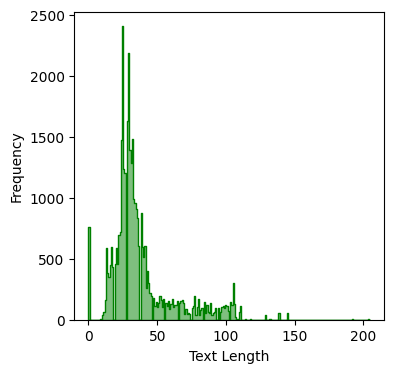

In [91]:
max_sentence_length_a = n2c2_df['sent_a_len'].max()
max_sentence_length_b = n2c2_df['sent_b_len'].max()

print(max_sentence_length)
# Define custom bins based on longest sentence length
bins = np.linspace(0, max_sentence_length+10, 11) 
print(bins)
n2c2_df = n2c2_df[n2c2_df['sent_a_len'] <= 256]
count_reviews_over_256 = len(n2c2_df[n2c2_df['sent_a_len'] <= 256])

print(f"Sentences <= 256: {count_reviews_over_256} out of {len(n2c2_df)} equal to {count_reviews_over_256/len(n2c2_df)}")   

# Create a histogram
plt.figure(figsize=(4, 4))
sns.histplot(data=n2c2_df, x='sent_a_len', element="step", color='green', alpha=0.5)
# sns.histplot(data=n2c2_df, x='sent_b_len', element="step", color='lightblue', alpha=0.5)
# plt.title('Histogram of Text Length: n2c2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig('../visualisation/n2c2_text_dist.pdf',bbox_inches='tight')
plt.show()


### i2b2 2010

In [92]:
i2b2_df = pd.read_csv(i2b2_file,header=None, delimiter='\t', names=['sentence', 'label'])
i2b2_df['sentence_len'] = i2b2_df['sentence'].apply(lambda text: len(word_tokenize(text)))

count_reviews_over_256 = len(i2b2_df[i2b2_df['sentence_len'] <= 256])

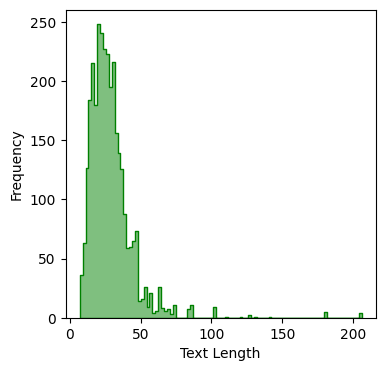

In [94]:
# Create a histogram
plt.figure(figsize=(4, 4))
sns.histplot(data=i2b2_df, x='sentence_len', element="step", color='green', alpha=0.5)
# plt.title('Histogram of Text Length: n2c2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig('../visualisation/i2b2_text_dist.pdf',bbox_inches='tight')
plt.show()

### EUADR

In [95]:
euadr_df = pd.read_csv(euadr_file,header=None, delimiter='\t', names=['sentence', 'label'])
euadr_df['sentence_len'] = euadr_df['sentence'].apply(lambda text: len(word_tokenize(text)))

count_reviews_over_256 = len(euadr_df[euadr_df['sentence_len'] <= 256])

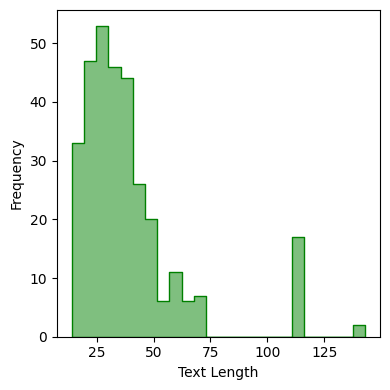

In [96]:
# Create a histogram
plt.figure(figsize=(4, 4))
sns.histplot(data=euadr_df, x='sentence_len', element="step", color='green', alpha=0.5)
# plt.title('Histogram of Text Length: n2c2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig('../visualisation/euadr_text_dist.pdf',bbox_inches='tight')
plt.tight_layout()
plt.show()

### Combined graph

/opt/anaconda3/envs/thesis02/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6


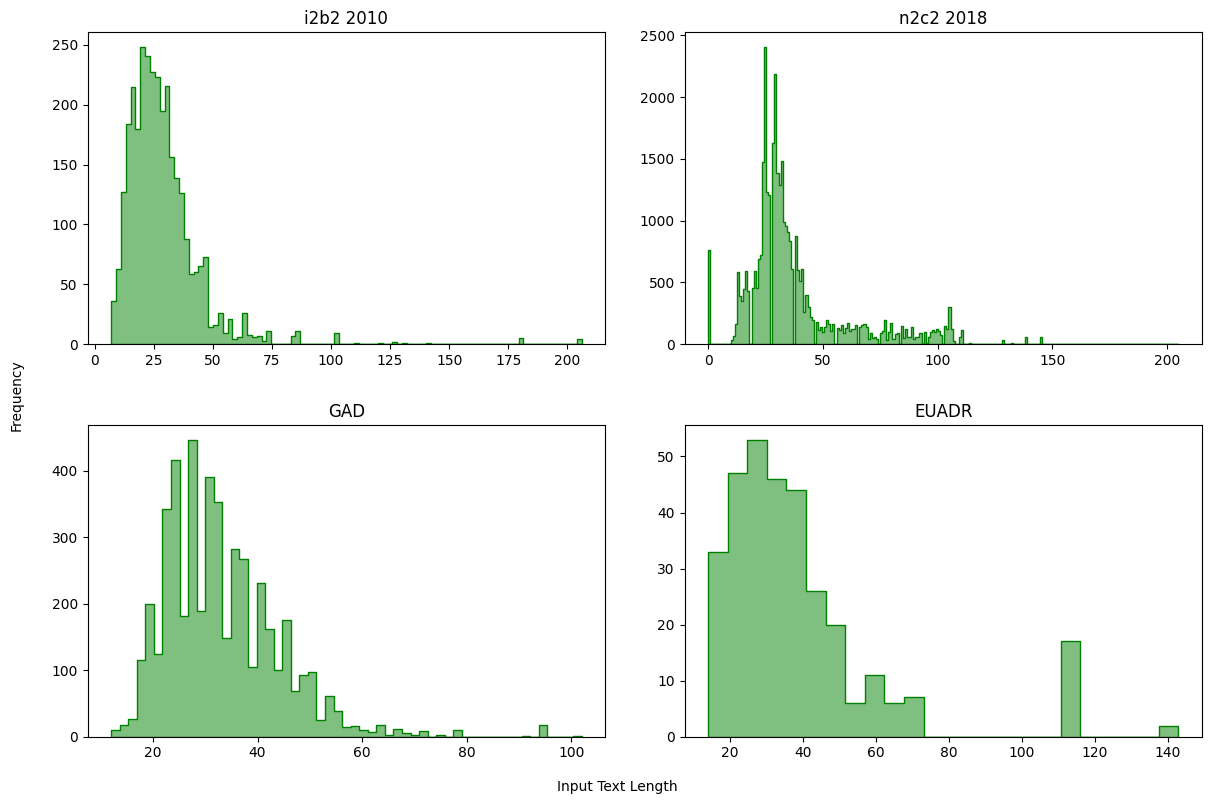

In [101]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axes[0, 0].set_title('i2b2 2010')  # Empty subplot title
axes[0, 0].set_xlabel(' ')  # Remove x-axis label
axes[0, 0].set_ylabel(' ')  # Remove y-axis label
sns.histplot(data=i2b2_df, x='sentence_len', element="step", color='green', alpha=0.5, ax=axes[0,0])

axes[0,1].set_title('n2c2 2018')  # Empty subplot title
axes[0,1].set_xlabel(' ')  # Remove x-axis label
axes[0,1].set_ylabel(' ')  # Remove y-axis label
sns.histplot(data=n2c2_df, x='sent_a_len', element="step", color='green', alpha=0.5, ax=axes[0,1])

axes[1, 0].set_title('GAD')  # Empty subplot title
axes[1, 0].set_xlabel(' ')  # Remove x-axis label
axes[1, 0].set_ylabel(' ')  # Remove y-axis label
sns.histplot(data=df, x='sentence_len', element="step", color='green', alpha=0.5, ax=axes[1,0])

axes[1,1].set_title('EUADR')  # Empty subplot title
axes[1,1].set_xlabel(' ')  # Remove x-axis label
axes[1,1].set_ylabel(' ')  # Remove y-axis label
sns.histplot(data=euadr_df, x='sentence_len', element="step", color='green', alpha=0.5, ax=axes[1,1])

fig.text(0.5, 0.01, 'Input Text Length', ha='center', va='center')
fig.text(0.0, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

plt.savefig('../visualisation/bench_text_dist.pdf',bbox_inches='tight', type="pdf")
plt.show()